# 변수 선택법 

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import * 
# from sklearn.preprocessing import StandardScaler

오늘 수업 시간에는 feature selection 중 가장 간단한 방법인 stepwise feature selection 에 대해 실습해보겠습니다.

### 지난 시간 복습: 다중 회귀 모델링

### 데이터 불러오기 및 데이터 확인

In [23]:
# 데이터 불러오기
df = pd.read_csv('./Boston_house.csv')
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [25]:
df.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170,22.532806
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994,9.197104
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000,5.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000,17.025000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000,21.200000
75%,94.075000,396.225000,6.623500,3.677082,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000,25.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000,50.000000


In [26]:
# null 값 확인
df.isnull().sum()

AGE        0
B          0
RM         0
CRIM       0
DIS        0
INDUS      0
LSTAT      0
NOX        0
PTRATIO    0
RAD        0
ZN         0
TAX        0
CHAS       0
Target     0
dtype: int64

### Input 과 Output 정의 및 모델 생성

In [63]:
import statsmodels.api as sm

In [64]:
# input과 output 정의
X,y = df[df.columns.drop('Target')], df[['Target']]
X1 = sm.add_constant(X, has_constant= 'add')

# linear regression model 학습
lm = sm.OLS(y, X1)
results = lm.fit()


In [65]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          6.72e-135
Time:                        15:26:23   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
B              0.0093      0.003      3.467      0.001       0.004       0.015
RM             3.8099      0.418      9.116      0.000       2.989       4.631
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

## 생각해 볼 문제:     
"[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems" 가
왜 발생했을까?

### Q1. 독립변수간의 상관관계가 있지 않을까?

In [28]:
# 데이터 불러오기
df = pd.read_csv('Boston_house.csv')
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


### Correlation coefficient 으로 확인

In [29]:
df.corr()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
AGE,1.000000,-0.273534,-0.240265,0.352734,-0.747881,0.644779,0.602339,0.731470,0.261515,0.456022,-0.569537,0.506456,0.086518,-0.376955
B,-0.273534,1.000000,0.128069,-0.385064,0.291512,-0.356977,-0.366087,-0.380051,-0.177383,-0.444413,0.175520,-0.441808,0.048788,0.333461
RM,-0.240265,0.128069,1.000000,-0.219247,0.205246,-0.391676,-0.613808,-0.302188,-0.355501,-0.209847,0.311991,-0.292048,0.091251,0.695360
CRIM,0.352734,-0.385064,-0.219247,1.000000,-0.379670,0.406583,0.455621,0.420972,0.289946,0.625505,-0.200469,0.582764,-0.055892,-0.388305
DIS,-0.747881,0.291512,0.205246,-0.379670,1.000000,-0.708027,-0.496996,-0.769230,-0.232471,-0.494588,0.664408,-0.534432,-0.099176,0.249929
INDUS,0.644779,-0.356977,-0.391676,0.406583,-0.708027,1.000000,0.603800,0.763651,0.383248,0.595129,-0.533828,0.720760,0.062938,-0.483725
LSTAT,0.602339,-0.366087,-0.613808,0.455621,-0.496996,0.603800,1.000000,0.590879,0.374044,0.488676,-0.412995,0.543993,-0.053929,-0.737663
NOX,0.731470,-0.380051,-0.302188,0.420972,-0.769230,0.763651,0.590879,1.000000,0.188933,0.611441,-0.516604,0.668023,0.091203,-0.427321
PTRATIO,0.261515,-0.177383,-0.355501,0.289946,-0.232471,0.383248,0.374044,0.188933,1.000000,0.464741,-0.391679,0.460853,-0.121515,-0.507787
RAD,0.456022,-0.444413,-0.209847,0.625505,-0.494588,0.595129,0.488676,0.611441,0.464741,1.000000,-0.311948,0.910228,-0.007368,-0.381626


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

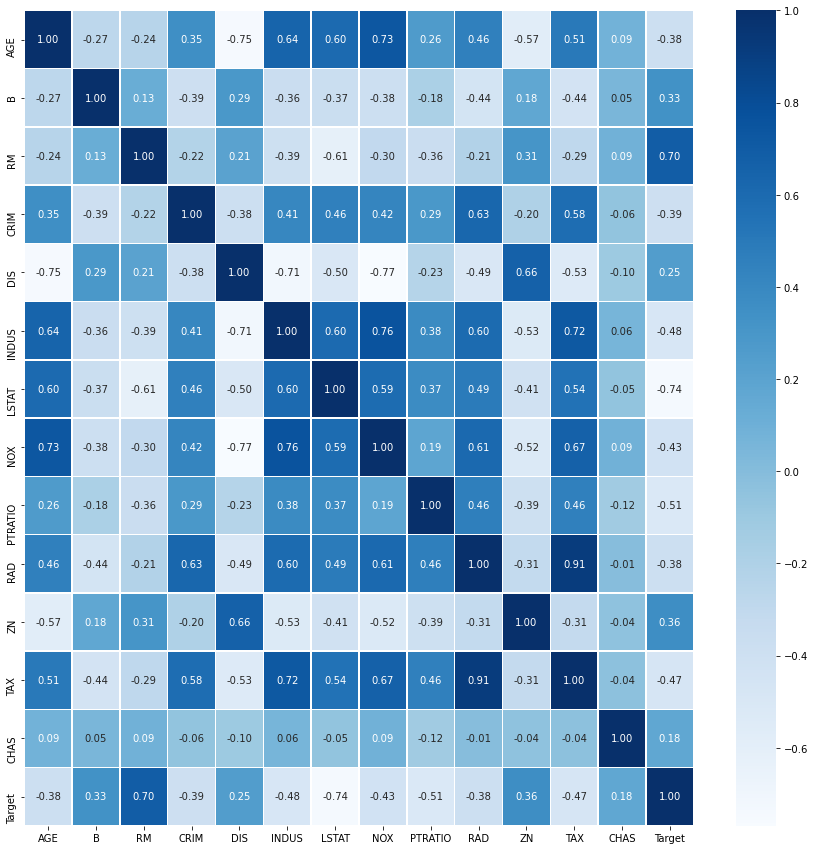

In [32]:
# 시각화를 시켜서 좀 더 편하게 해석
plt.figure(figsize=(15,15))

sns.heatmap(data = df.corr(), annot=True, 
            fmt = '.2f', linewidths=.5, cmap='Blues')

### VIF 를 이용해서 확인

In [38]:
# 시각화 이외에도 VIF를 이용해서 correlation을 확인할 수 있음.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
# 독립 변수와 종속 변수 나누기
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [40]:
# VIF 구하기
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) 
                     for i in range(X.shape[1])]
vif["features"] = X.columns
vif
# 일반적으로 9보다 큰 경우 다른 변수와 correlation이 크다고 판단합니다.

,VIF Factor,features
0,21.386850,AGE
1,20.104943,B
2,77.948283,RM
3,2.100373,CRIM
4,14.699652,DIS
5,14.485758,INDUS
6,11.102025,LSTAT
7,73.894947,NOX
8,85.029547,PTRATIO
9,15.167725,RAD


간단한 방법인 stepwise feature selection 에 대해 실습해보겠습니다

In [67]:
from sklearn.feature_selection import RFE # Feature ranking with recursive feature elimination. 
from sklearn.feature_selection import RFECV # Feature ranking with recursive feature elimination using cross validation
# 모델 학습에 시간이 오래 걸리지 않으므로 Cross validation을 사용하겠습니다.

In [68]:
# 모델 선언
estimator = LinearRegression()

In [69]:
# Feature ranking with recursive feature elimination. 
selector = RFECV(estimator, step=1, cv= 5)

In [70]:
# Find the best feature set.
selector.fit(X, y)

RFECV(cv=5, estimator=LinearRegression())

In [71]:
features_to_use = X.columns[selector.support_]

In [73]:
# selected features
features_to_use

Index(['RM', 'DIS', 'LSTAT', 'NOX', 'PTRATIO', 'CHAS'], dtype='object')

In [74]:
# 위에서 찾은 subset으로 모델을 학습해보겠습니다.
X_sub = X.loc[:,features_to_use]

In [77]:
X_sub1 = sm.add_constant(X_sub, has_constant= 'add')

# linear regression model 학습
lm = sm.OLS(y, X_sub1)
results_sub = lm.fit()

In [78]:
results_sub.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     209.4
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          7.91e-133
Time:                        15:32:33   Log-Likelihood:                -1522.0
No. Observations:                 506   AIC:                             3058.
Df Residuals:                     499   BIC:                             3088.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9226      4.559      8.099      0.000      27.965      45.880
RM             4.1118      0.407     10.097      0.000       3.312       4.912
DIS           -1.1446      0.167     -6.865      0.000      -1.472      -0.817
LSTAT         -0.5698      0.047    -12.010      0.000      -0.663      -0.477
NOX          -18.7404      3.227     -5.807      0.000     -25.081     -12.400
PTRATIO       -1.0027      0.113     -8.895      0.000      -1.224      -0.781
CHAS           3.2443      0.883      3.673      0.000       1.509       4.980
==============================================================================
Omnibus:                      174.026   Durbin-Watson:                   1.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              763.948
Skew:                           1.483   Prob(JB):                    1.29e-166
Kurtosis:                       8.238   Cond. No.                         545.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Multi-corlinearity 문제가 해결됐을 뿐만 아니라 R^2 도 크게 달라지지 않음.